# COGS 118A - Final Project

# Online Shopper Purchasing Prediction

## Names

- Jiayi Zhao
- Beibei Du
- Hongfei Lyu
- Meijiang Shen
- Shirui Huang

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents 
- the solution/what you did
- major results you came up with (mention how results are measured) 
With the shift to digital life, online shopping becomes the major source of consumer consumption for its convenient features and personalized settings. It would be highly profitable if we can learn the patterns and attribution of consumer purchase decisions either for companies to predict and increase profits or to further personalize consumer experiences. Thus, in our project, we aim to predict the final purchase decisions of consumers based on their shopping behaviors. We employ the “Online Shoppers Purchasing Intention” dataset from UCI Machine Learning Repository measuring various aspects of consumer shopping behaviors including time-spent on page, number of pages browsed, special days influence, etc. Then we apply various machine learning models such as logistic regression, K-NN, and decision trees to fit the data and use confusion matrix and classification accuracy as the metrics to evaluate the performance of our models.

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

# Background

As people are more prone to spending time on shopping online rather than physical shopping in the mall, there are astronomical amounts of merchants deciding to sell their products online or hybrid to gain more profits/ for marketing reasons. Specifically, people choose websites/Apps like Amazon, Ebay, Instacart, etc. Especially during the COVID-19 pandemic, with the condition of quarantine, many people purchase things on their phone/electrical devices and get them delivered. No matter in what case, voluntarily or involuntarily, online shopping becomes both recreational and convenient tools for the customers. While the customers tried to benefit from the online shopping, the online stores needed to target more customers and analyze their behaviors to maximize their benefits. Thus an evaluation process of whether the customers will purchase the product or not becomes the core question the businesses want to answer. As mentioned in *Performance Study of Classification Algorithms for Consumer Online Shopping Attitudes and Behavior Using Data Mining, data mining including the machine learning* has been useful in “to help online shopping stores to identify online customer behavior to recommend for him the appropriate products he/she is interesting to them” <a name="rana"></a>[<sup>[1]</sup>](#rananote). Machine learning has been used as a quantitative solution to the question on how the merchants decide whether the customers will purchase the item or not based on their behaviors. Using classification to detect the patterns of the customer's purchasing intention will benefit the purchase rate. 

On the other hand, many other machine learning algorithms have been prevalent in answering the question on how to determine the customer’s purchasing intentions. In *Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks*, they fed the informational data into algorithms such as random forest, multilayer perceptron and support vector machines<a name="sakar"></a>[<sup>[2]</sup>](#sakarnote). No matter what algorithms are being used, they all aim to predict the intention behind purchaser’s behaviors to change merchant’s e-commerce strategies to double win. Combined with the two papers, they used both supervised and unsupervised machine learning algorithms. For example, in *Web usage mining to improve the design of an e-commerce website: OrOliveSur.com*, they tried to use these machine learning algorithms to achieve the better design of the e-commerce website to attract more customers to purchase the items<a name="carmona"></a>[<sup>[3]</sup>](#carmonanote).

Based on the existing studies on online shoppers intention study, customers can get a sense of how they can improve their e-commerce websites and strategies to benefit their customers’ shopping experience while they can also get profits at the same time. In our study of prediction of online shopper’s intentions, by predicting whether they purchase the items or not using multiple supervised machine learning algorithms, the merchants could provide further solutions/revisions to the current e-commerce system.

# Problem Statement
How can we predict the final purchase decisions of consumers based on their online shopping behaviors like the type of visitor? What model we use such as logistic regression, K-NN, and decision tree has the best performance on predicting the purchase decisions?

# Data


- UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#)
    - It contains 12,330 observations where each observation belongs to a different user in a one-year period to avoid the tendency to a specific campaign, day, user profile, or period. 
    - It has 18 variables where 17 of them represents the information about a particular customer, such as if this customer is viewing this page at a special holiday, or how long this customer spent on this page; the "Revenue" variable represents whether this customer made a purchase, which will be the label for our model. 
        1. Administrative: The number of pages of administrative that the user visited.
        2. Administrative_Duration: The amount of time spent in Administrative pages.
        3. Informational: The number of pages of informational that the user visited.
        4. Informational_Duration: The amount of time spent in Informational pages.
        5. ProductRelated: The number of pages of product related that the user visited.
        6. ProductRelated_Duration: This is the amount of time spent in ProductRelated pages.
        7. BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.
        8. ExitRates: The percentage of pageviews on the website that end at that specific page.
        9. PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce
        10. SpecialDay: The closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in
        11. Month: The month the pageview occurred, in string form.
        12. OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.
        13. Browser: An integer value representing the browser that the user was using to view the page.
        14. Region: An integer value representing which region the user is located in.
        15. TrafficType: An integer value representing what type of traffic the user is categorized into.
        16. VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.
        17. Weekend: A boolean representing whether the session is on a weekend.
        18. Revenue: A boolean representing whether or not the user completed the purchase.

    - However, some of the variables, such as "Region" and "Operating System", are represented as a number 1 to 9 but so far there is not much information about what those numbers represent. Those variables may require future investigations and information to be interpreted.


## Setup

In [1]:
# Import pandas to read csv file and manage heterogenous data
import pandas as pd

# Import numpy to store numeric information and perform numerical analysis
import numpy as np

# Import matplotlib.pyplot and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning & Data Wrangling

In [2]:
# Import the dataframe
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


We first want to check the data type of each column element and convert nonnumeric element into numeric value and categorical feature into a set of binary features.

In [3]:
df = df.rename(columns={'Revenue': 'Purchase'})
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Purchase                      bool
dtype: object

Since the `OperatingSystems`, `Browser`, `Region`, and `TrafficType` columns data do not offer the interpretation of each value, we decided to drop these categorical columns. 

In [4]:
# Convert unbinary element into binary value
df["Purchase"] = df["Purchase"].replace([True, False],[1, 0])
df["Weekend"] = df["Weekend"].replace([True, False],[1, 0])
df = df.drop(columns = ['OperatingSystems', 'Browser', 'Region', 'TrafficType'])

Since `Month` and `VisitorType` are categorical variable, we should use **one hot encoding** to convert a categorical feature into a set of binary features 

In [5]:
def one_hot(df, column):
    """
    one hot encoding function to convert categorical feature into a set of binary features and append it to the dataframe
    
    Arguments:
        df: DataFrame
        column: str
            the column that need to be one hot encoding
    """ 
    # get the new binary features based on the given column
    onehot = pd.get_dummies(df[column]).astype(int)
    # rename the new columns
    onehot.columns = [column + '_' + str(x) for x in onehot.columns]
    # drop the original column
    tmp = df.drop(columns = [column])
    # concate the new columns to the dataframe
    tmp = pd.concat([onehot, tmp], axis=1)
    return tmp

In [6]:
categorical_cols = ['VisitorType', 'Month']
for c in categorical_cols:
    df = one_hot(df, c)

In [7]:
df.columns

Index(['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Administrative',
       'Administrative_Duration', 'Informational', 'Informational_Duration',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Weekend', 'Purchase'],
      dtype='object')

Take a look on the cleaned dataframe

In [8]:
df.head()

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,...,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Purchase
0,0,0,1,0,0,0,0,0,0,0,...,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,0


## Exploratory Data Analysis (EDA)

In [9]:
# have a basic sense of the whole datase
df.describe()

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,...,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Purchase
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,...,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,0.035118,0.140065,0.014923,0.035036,0.023358,0.154663,0.272830,0.243147,0.044526,0.036334,...,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,0.232603,0.154745
std,0.184084,0.347068,0.121250,0.183880,0.151043,0.361598,0.445432,0.429000,0.206268,0.187128,...,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,1.000000,1.000000


By creating the scatter plot, we aim at exploring the association between `Administrative`, `Informational` and `ProductRelated` with corresponding duration of each purchasing choice. 

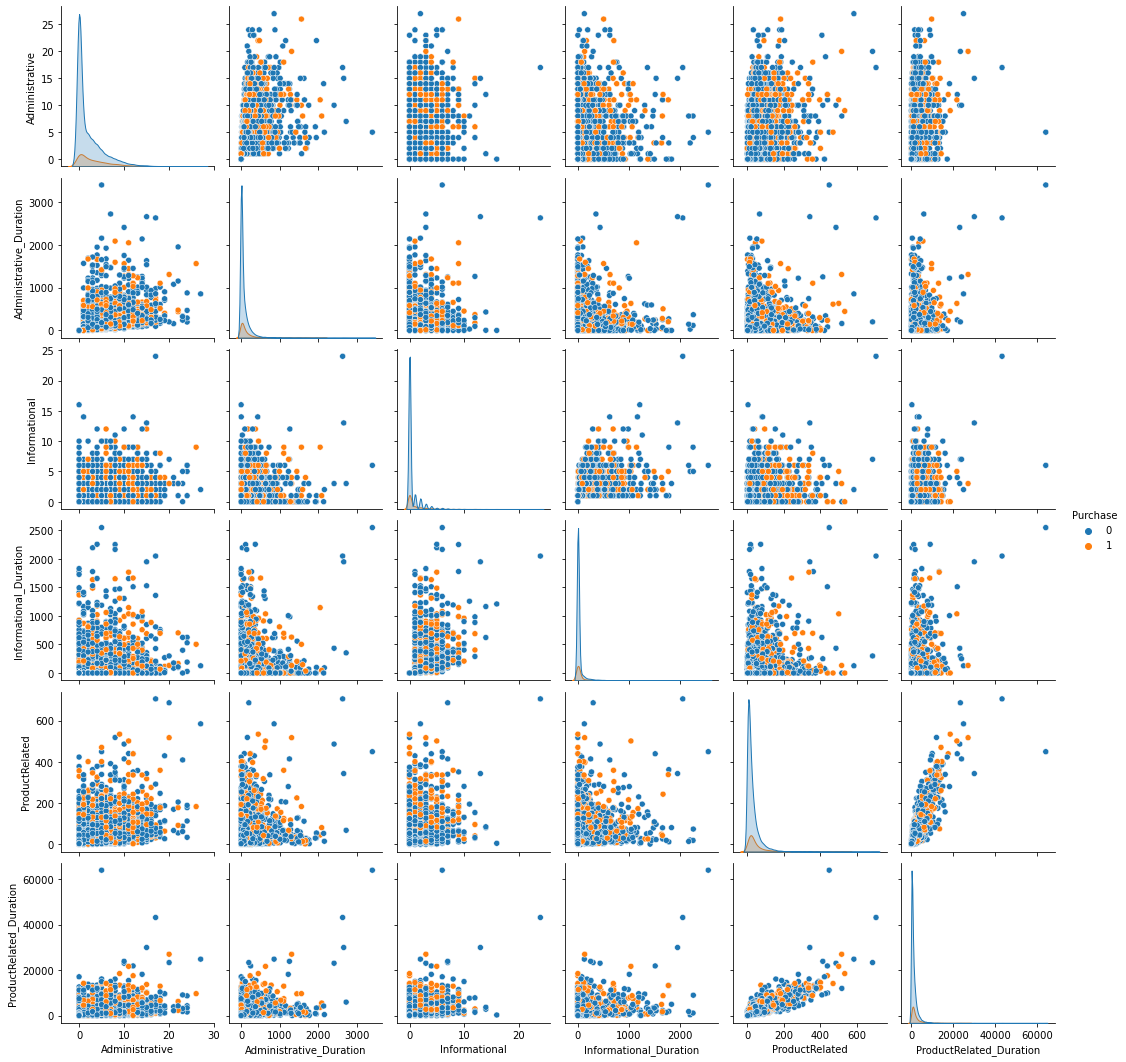

In [10]:
info_adm_pdt = df[['Administrative',
       'Administrative_Duration', 'Informational', 'Informational_Duration',
       'ProductRelated', 'ProductRelated_Duration','Purchase']]
sns.pairplot(info_adm_pdt, hue="Purchase")

#### Examinate the Distribution of `Administrative`, `Informational` and `ProductRelated`

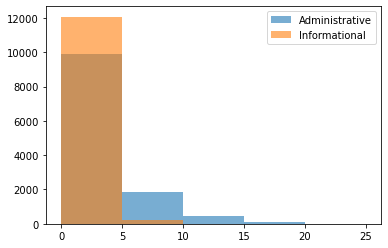

In [11]:
plt.hist(df['Administrative'],alpha = 0.6,label = "Administrative", bins = np.arange(0,30,5))
plt.hist(df['Informational'],alpha = 0.6,label = "Informational", bins = np.arange(0,30,5))
#plt.hist(df['ProductRelated'],alpha = 0.6,label = "ProductRelated")
plt.legend()

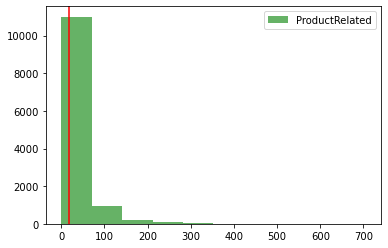

In [12]:
plt.hist(df['ProductRelated'],alpha = 0.6,label = "ProductRelated",color = 'g')
pg_count3 = df['ProductRelated'].median()
plt.axvline(x = pg_count3, color = 'r') # red line indicating the median value
plt.legend()

#### Examinate the Distribution of `Administrative_Duration`, `Informational_Duration` and `ProductRelated_Duration`

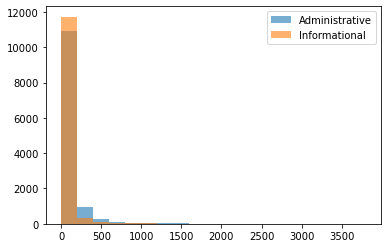

In [13]:
plt.hist(df['Administrative_Duration'],alpha = 0.6,label = "Administrative", bins = np.arange(0,4000, 200))
plt.hist(df['Informational_Duration'],alpha = 0.6,label = "Informational", bins = np.arange(0,4000, 200))
plt.legend()

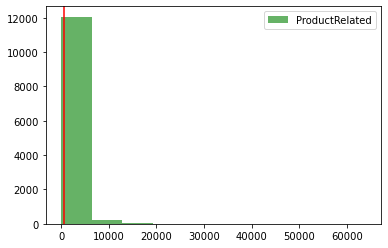

In [14]:
plt.hist(df['ProductRelated_Duration'],alpha = 0.6,label = "ProductRelated",color = 'g')
duration_count3 = df['ProductRelated_Duration'].median()
plt.axvline(x = duration_count3, color = 'r') # red line indicating the median value
plt.legend()

We see that all the distribution we plotted above has the similar shape of skewed to the right. From the  histograms above, we could see that people tend to view more pages in product related sites compared with the `Administrative` and `Informational` pages.

In this three columns, it follows the same pattern as the previous three columns: People tends to read more/spend more time in reading the `ProductRelated` pages whereas not tending to spend time in `Informational` pages.

#### Examinate the Association Between `Bounce Rate` and `Exit Rate`

Text(0, 0.5, 'Exit Rates')

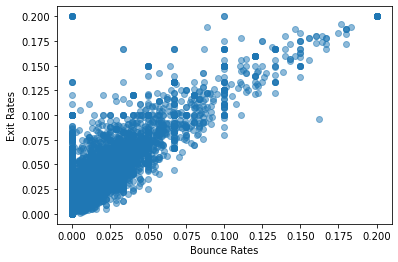

In [15]:
# Bounce Rate vs. Exit Rates
plt.scatter(df['BounceRates'], df['ExitRates'],alpha = 0.5)
plt.xlabel('Bounce Rates')
plt.ylabel('Exit Rates')

In [16]:
buy_bounce_rate = df[df['Purchase'] == 1]['BounceRates'].mean()
not_buy_bounce_rate = df[df['Purchase'] == 0]['BounceRates'].mean()
print(buy_bounce_rate,not_buy_bounce_rate)
buy_exit_rate = df[df['Purchase'] == 1]['ExitRates'].mean()
not_buy_exit_rate = df[df['Purchase'] == 0]['ExitRates'].mean()
print(buy_exit_rate,not_buy_exit_rate)

0.005117152640461212 0.025317232197850356
0.019555168256813433 0.04737827052648154


We can clearly see that if people are buying the products, then the bouncerate is lower (~0.005) whereas people not buying the products having a bounce rate about 0.25. Similarily, the exit rate for people that are not buying the products is 0.47 compared with those who are buying the products: 0.019.

#### Comparing the Purchase Choice between Special Day and Normal Day

In [17]:
buy_special_day = df[(df['SpecialDay'] == 1) & (df['Purchase'] == 1)].shape[0]
not_buy_special_day = df[(df['SpecialDay'] == 1) & (df['Purchase'] == 0)].shape[0]
speical_day_count = df[(df['SpecialDay'] == 1)].shape[0]
print(f"The buy rate on special day is {buy_special_day/speical_day_count}")
print(f"The not-buy rate on special day is {not_buy_special_day/speical_day_count}")

The buy rate on special day is 0.06493506493506493
The not-buy rate on special day is 0.935064935064935


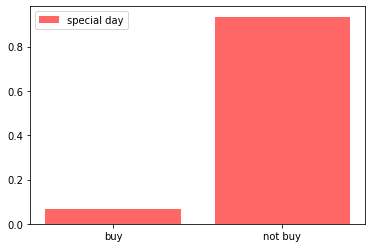

In [18]:
x1 = [(buy_special_day/speical_day_count),(not_buy_special_day/speical_day_count)]
plt.figure()
plt.bar(['buy','not buy'],x1, label = 'special day',color = 'r',alpha = 0.6)
plt.legend()

In [19]:
buy_normal_day = df[(df['SpecialDay'] == 0) & (df['Purchase'] == 1)].shape[0]
not_buy_normal_day = df[(df['SpecialDay'] == 0) & (df['Purchase'] == 0)].shape[0]
normal_day_count = df[(df['SpecialDay'] == 0)].shape[0]
print(f"The buy rate on normal day is {buy_normal_day/normal_day_count}")
print(f"The not-buy rate on normal day is {not_buy_normal_day/normal_day_count}")

The buy rate on normal day is 0.16526762343171766
The not-buy rate on normal day is 0.8347323765682824


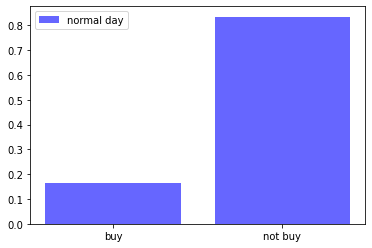

In [20]:
x2 = [(buy_normal_day/(normal_day_count)),(not_buy_normal_day/normal_day_count)]
plt.figure()
plt.bar(['buy','not buy'],x2,label = 'normal day',color = 'b', alpha = 0.6)
plt.legend()

Based on the rate above, if it's a special day, the rate of buying is 0.65. Suprisingly, the buying rate seems to be higher in normal days compared with the special days. We think the reason behind is that the sample size for `SpecialDay` is smaller than the normal days.

#### Comparing the Purchase Choice Made in Each Month

In [21]:
month_lst = ['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep']
buying_count_over_month = [df[(df[i] == 1) & (df['Purchase'] == 1)].shape[0] for i in month_lst]
for i in range(len(buying_count_over_month)):
    print(f"The buying count in {month_lst[i]} month is {buying_count_over_month[i]}")

The buying count in Month_Aug month is 76
The buying count in Month_Dec month is 216
The buying count in Month_Feb month is 3
The buying count in Month_Jul month is 66
The buying count in Month_June month is 29
The buying count in Month_Mar month is 192
The buying count in Month_May month is 365
The buying count in Month_Nov month is 760
The buying count in Month_Oct month is 115
The buying count in Month_Sep month is 86


<BarContainer object of 10 artists>

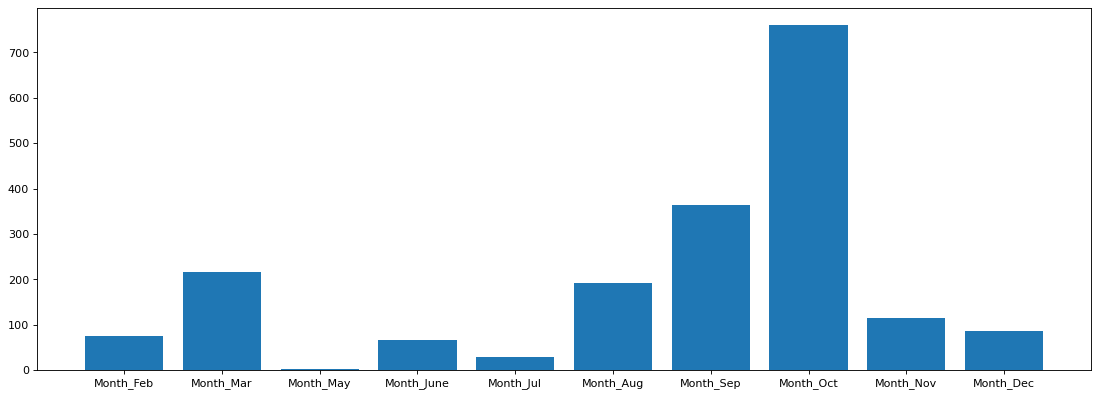

In [22]:
from matplotlib.pyplot import figure
figure(figsize=(17, 6), dpi=80)
buying_count_over_month = [df[(df[i] == 1) & (df['Purchase'] == 1)].shape[0] for i in month_lst]
month_lst = ['Month_Feb', 'Month_Mar', 'Month_May', 'Month_June', 'Month_Jul',
       'Month_Aug', 'Month_Sep', 'Month_Oct', 'Month_Nov', 'Month_Dec']
x =  [buying_count_over_month[i] for i in range(len(buying_count_over_month))]
plt.bar(month_lst,x)

From the above count calculation, we could see that the highest two counts of buying records happened in May and November. It might due to the black Friday and sales season. The black Friday happens in November. However, we are missing the online shopping data from January and April, which might leads to some bias for the following model prediction.

#### Comparing the Purchase Choice between Weekday and Weekend

In [23]:
buy_weekend = df[(df['Weekend'] == 1) & (df['Purchase'] == 1)].shape[0]
not_buy_weekend = df[(df['Weekend'] == 1) & (df['Purchase'] == 0)].shape[0]
print(buy_weekend,not_buy_weekend,buy_weekend/(buy_weekend+not_buy_weekend))

buy_nonweekend = df[(df['Weekend'] == 0) & (df['Purchase'] == 1)].shape[0]
not_buy_nonweekend = df[(df['Weekend'] == 0) & (df['Purchase'] == 0)].shape[0]
print(buy_nonweekend,not_buy_nonweekend,buy_nonweekend/(buy_nonweekend+not_buy_nonweekend))

499 2369 0.17398884239888424
1409 8053 0.1489114352145424


<AxesSubplot:xlabel='Weekend', ylabel='Count'>

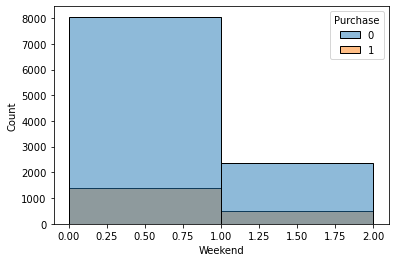

In [24]:
sns. histplot(df, x = 'Weekend', hue = 'Purchase', binrange = (0,2), binwidth=1)

The people tend to not to buy on weekends. However, compared with the week days, the buying rate on weekends is still a little bit higher than the weekdays.

#### The Distribution of Visitor Types

In [25]:
new_buy = df[(df['VisitorType_New_Visitor'] == 1) & (df['Purchase'] == 1)].shape[0]
new_ = df[(df['VisitorType_New_Visitor'] == 1)].shape[0]

return_buy = df[(df['VisitorType_Returning_Visitor'] == 1) & (df['Purchase'] == 1)].shape[0]
return_  = df[(df['VisitorType_Returning_Visitor'] == 1)].shape[0]

print(f"The percentage of new users buying the product is {new_buy/new_}")
print(f"The percentage of returning users buying the product is {return_buy/return_}")

The percentage of new users buying the product is 0.24911452184179456
The percentage of returning users buying the product is 0.1393232868922377


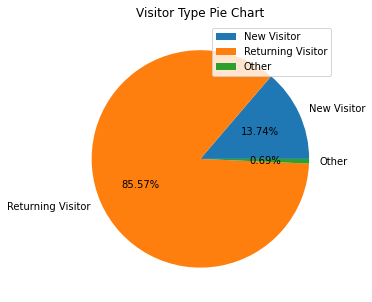

In [26]:
plt.rcParams['figure.figsize'] = (16, 5)
counter = [df[df['VisitorType_New_Visitor'] == 1].shape[0], 
           df[df['VisitorType_Returning_Visitor'] == 1].shape[0], 
           df[df['VisitorType_Other']==1].shape[0]]
plt.figure()
plt.pie(counter,autopct = '%.2f%%', labels = ['New Visitor','Returning Visitor','Other'])
plt.title('Visitor Type Pie Chart')
plt.legend()

We could see that most visitors are returning vistors among all visitor types.

# Proposed Solution

For this project, we aim to predict if the consumer would make a purchase based on the dataset featuring multiple aspects of online shopping behavior. We will employ 4 different machine learning models: logistic regression, K-NN, decision trees, and SVMs (other proper models may be employed after exploration). The deliberate decision of choosing those 4 models stems from the fact that the dataset contains numeric variables and a binary output variable. Thus, only classification models such as K-NN, decision trees and SVMs would be considered. 

In addition, logistic regression is another statistical analysis method borrowed by Machine Learning. It is used when our dependent variable is dichotomous or binary. Considering the binary nature of output values, logistic regression seems viable too. The main coding component would involve sklearn, such as LogisticRegression from sklearn.linear_model, KNeighborsClassifier from sklearn.neighbors, DecisionTreeClassifier from sklearn.tree, and SVC from sklearn.svm. We will first use k-fold or straitified k-fold to select hyper paramters that gives us the best performance for all the models mentioned above, train the model on the entire training dataset, and run those models on our testing set to get and compare their performance. For performance, we will focus on the accuracy and ROC curve and we will visualize them by drawing the confusion matrx and ROC curve.

# Evaluation Metrics

We will apply the confusion matrix, which gives us a matrix as output and describes the complete performance of the model. In the confusion matrix, every row will be ground truth and every column will be the prediction. We can calculate the recall and precision value to evaluate the relationship between the true purhchase output and predicted output. Recall is the measure for how many true purhchase output get predicted out of all the purhchase output in the dataset while precision is the measure of the correctness of a purhchase output prediction.

In addition, an ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters - True Positive Rate and False Positive Rate.
True Positive Rate (TPR) is a synonym for recall and False Positive Rate (FPR) is a synonym for precision. An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.

Moreover, classification accuracy will be the major evaluation metric in this project, which is the ratio of the number of correct predictions to the total number of input samples. 
* For example, we will use model selection to split our training and testing sets into two sets of X and Y, where X is the set of features on customers behavior and days and Y is the result of whether customers purchase or not. After we generate our predictions using models, we will print out the classification report using sklearn.metrics packages to see the accuracy result of the predictions compared to the testing Y.

## Train-Test Spilt

We first would like to split our dataset into 80% training set and 20% testing set.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import eli5
from eli5.sklearn import PermutationImportance

In [28]:
X = df.drop('Purchase', axis = 1)
y = df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Logistic Regression

We first train a simple Logistic Regression on out training set, and then print out the score, Confusion Matrix, and ROC curve. 

In [29]:
# select Logistic Regression as our model
clf = LogisticRegression(random_state=0, max_iter = 50000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

# get the accuracy for our model
score = clf.score(X_test, y_test)
print("The accuracy we got in our testing set is ", score)

The accuracy we got in our testing set is  0.889294403892944


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2115
           1       0.70      0.38      0.50       351

    accuracy                           0.89      2466
   macro avg       0.80      0.68      0.72      2466
weighted avg       0.88      0.89      0.88      2466



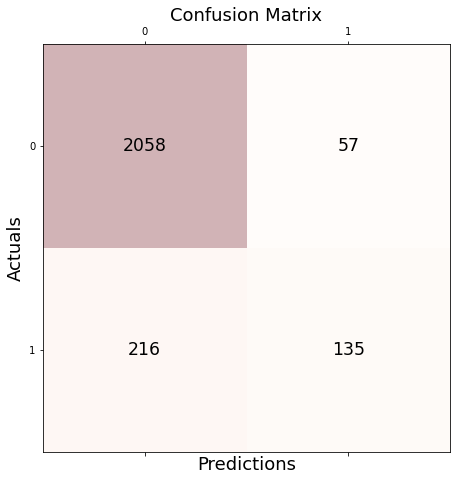

In [30]:
print(classification_report(y_test, y_pred))

# get and plot the confusion matrix for our model
cm1 = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm1, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax.text(x=j, y=i,s=cm1[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.9080236810733264


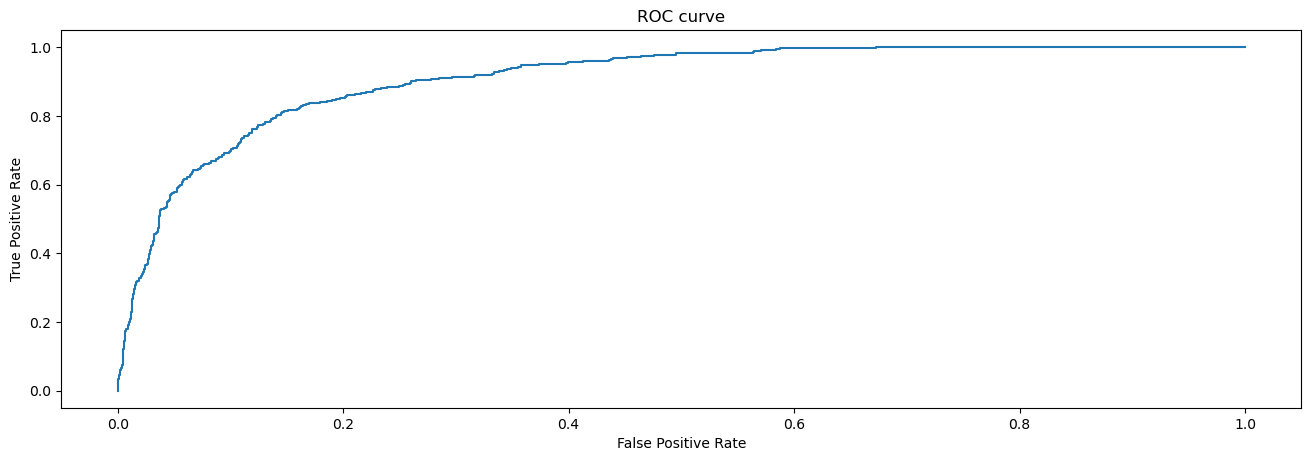

In [31]:
fpr = roc_curve(y_test, clf.predict_proba(X_test)[:,1])[0]  # false positive rate
tpr = roc_curve(y_test, clf.predict_proba(X_test)[:,1])[1]  # true positive rate
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

# get and plot the ROC curve for our model
plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc)

In [32]:
# finding the Permutation importance

perm = PermutationImportance(clf).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0760 ± 0.0075,PageValues
0.0024 ± 0.0021,VisitorType_Returning_Visitor
0.0009 ± 0.0024,Month_Nov
0.0009 ± 0.0012,Month_Dec
0.0006 ± 0.0008,ProductRelated_Duration
0.0006 ± 0.0008,Informational
0.0003 ± 0.0003,SpecialDay
0.0003 ± 0.0006,Month_Oct
0.0002 ± 0.0004,Administrative_Duration
0.0002 ± 0.0012,Month_Mar


From this application of 'Permutation Importance' to our logistic regression model, 'PageValues' and 'Returning Visitor' appear to us as the main feature of importance when defining who will or will not make the purchase. This indicated that the more the product page has been viewed, the larger chance the customer will purchase. In addition, returning visitor seems to make the purchase decision more.

However, we could have a better model when selecting better hyperparameters. So we will do a grid search on different hyperparameter. Then we will select the best model from the grid, train on entire training set and evaluate best model on the test set.

In [33]:
# create a pipeline 
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# create search space of candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [LogisticRegression(max_iter=1000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=1000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=1000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]


# create grid search 
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5), n_jobs = -1,
                   scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'], refit=False,
                   verbose=0)

# fit grid search
best_model = clf.fit(X_train, y_train)

Take a look at our grid search result

In [34]:
best_model.cv_results_

{'mean_fit_time': array([0.02849622, 0.07590842, 0.08350377, 0.06417475, 0.12940178,
        0.14366174, 0.55658669, 0.38879089, 0.72470627, 0.50435376,
        0.64737802, 0.5357574 , 0.69090986, 0.54721751, 0.70645866,
        0.54729466, 0.6764832 , 0.53953753, 1.42450256, 0.02621069,
        0.0372375 , 0.04630599, 0.0576108 , 0.04791732, 0.05091891,
        0.04991126, 0.04822764, 0.0458199 , 0.40240765]),
 'std_fit_time': array([0.00361964, 0.00530308, 0.00471964, 0.00142439, 0.00843137,
        0.0181239 , 0.06751444, 0.08809696, 0.23596016, 0.14233427,
        0.15380096, 0.15792707, 0.19492574, 0.14347641, 0.20632176,
        0.15277735, 0.15639909, 0.13313352, 0.69776842, 0.0011663 ,
        0.00123044, 0.00415285, 0.00537088, 0.00257151, 0.00546733,
        0.0049127 , 0.00303712, 0.00813633, 0.15317393]),
 'mean_score_time': array([0.01127534, 0.01253233, 0.01231728, 0.01136942, 0.01183848,
        0.00989614, 0.01006427, 0.01021094, 0.01009674, 0.00980864,
        0.009985

In [35]:
# get the model with highest accuracy from grid search
p_accu = best_model.cv_results_['params'][np.argmin(best_model.cv_results_['rank_test_accuracy'])]
p_accu

{'classifier': LogisticRegression(max_iter=1000),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [36]:
# set the selected parameter to the pipeline
pipe.set_params(**p_accu)

Pipeline(steps=[('std', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=1000, penalty='l1',
                                    solver='saga'))])

In [37]:
# train on the entire training set with the model with highest accuracy from grid search
clf = pipe.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score1 = clf.score(X_test, y_test)
print("The accuracy score for this model is", score1)

The accuracy score for this model is 0.8909164639091647


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2115
           1       0.71      0.39      0.50       351

    accuracy                           0.89      2466
   macro avg       0.81      0.68      0.72      2466
weighted avg       0.88      0.89      0.88      2466



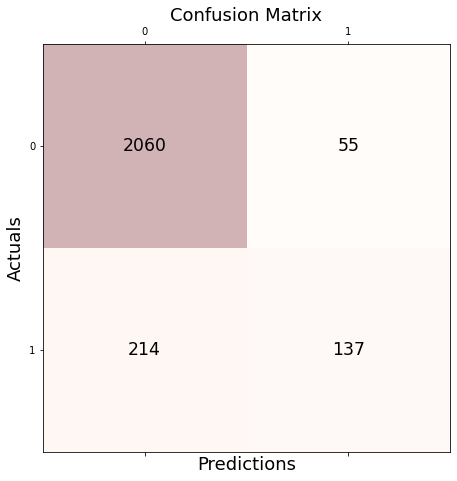

In [38]:
print(classification_report(y_test, y_pred))

cm2 = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm2, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        ax.text(x=j, y=i,s=cm2[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.9066874111791369


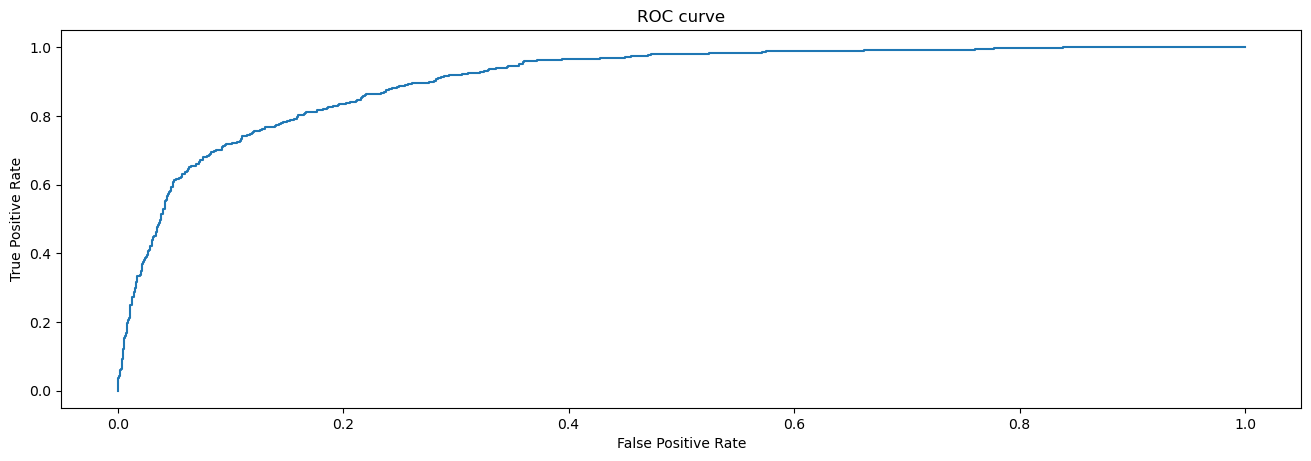

In [39]:
fpr = roc_curve(y_test, clf.predict_proba(X_test)[:,1])[0]  # false positive rate
tpr = roc_curve(y_test, clf.predict_proba(X_test)[:,1])[1]  # true positive rate
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

# plotting the ROC curve
plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc)

In [40]:
# get the model with largest Area Under the Receiver Operating Characteristic Curve from grid search
p_rao = best_model.cv_results_['params'][np.argmin(best_model.cv_results_['rank_test_roc_auc_ovr'])]
p_rao

{'classifier': LogisticRegression(max_iter=1000, penalty='l1', solver='saga'),
 'classifier__C': 0.01,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [41]:
# set the selected parameter to the pipeline
pipe.set_params(**p_rao)
clf = pipe.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
print("The accuracy score for this model is", score)

The accuracy score for this model is 0.8880778588807786


              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2115
           1       0.74      0.33      0.46       351

    accuracy                           0.89      2466
   macro avg       0.82      0.66      0.70      2466
weighted avg       0.88      0.89      0.87      2466



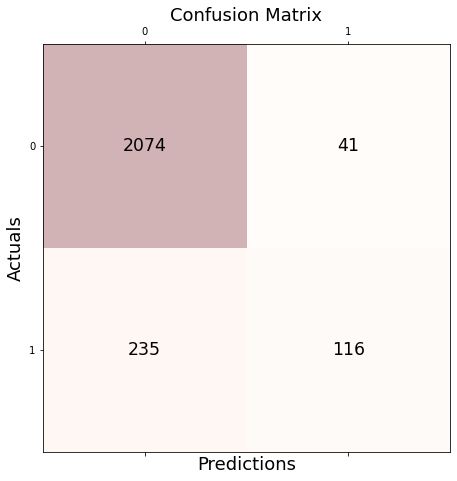

In [42]:
print(classification_report(y_test, y_pred))

cm3 = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm3, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm3.shape[0]):
    for j in range(cm3.shape[1]):
        ax.text(x=j, y=i,s=cm3[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.9098516228539869


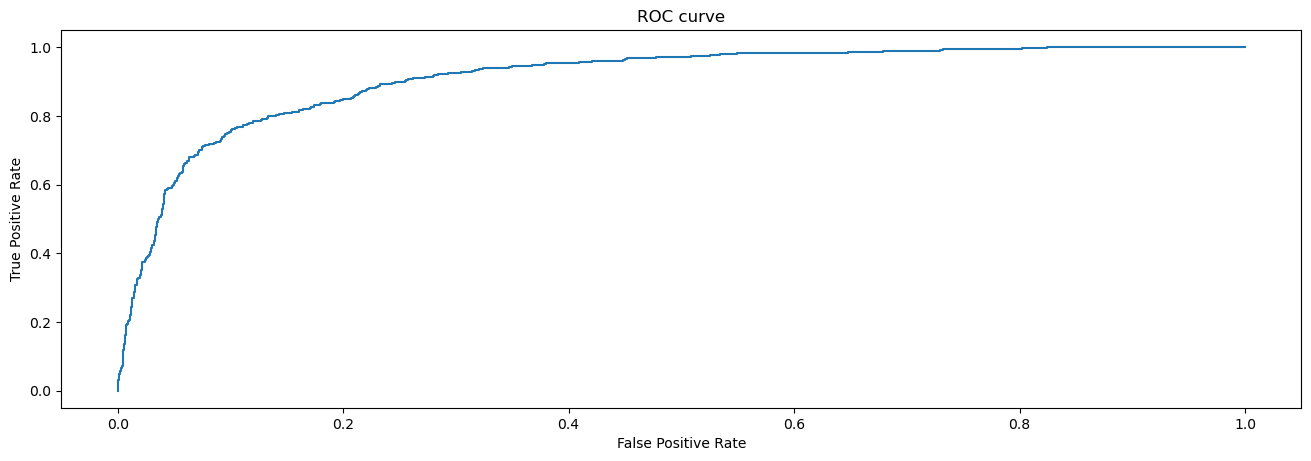

In [43]:
fpr = roc_curve(y_test, clf.predict_proba(X_test)[:,1])[0]  # false positive rate
tpr = roc_curve(y_test, clf.predict_proba(X_test)[:,1])[1]  # true positive rate
roc_auc1 = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

# plotting the ROC curve
plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Area under the Receiver Operating Characteristic curve:', roc_auc1)

Now we have the logistic regression model with highest accuracy and largest Area under the Receiver Operating Characteristic curve above, we will compare those two models with other models in the following.

## K-Nearest Neighbors Classification (KNN)

We train a KNN model on our dataset in order to compute the similarity between the point we want to predict and every data points in our dataset. We then print out its **Accuracy, Confusion Matrix, and ROC curve** to evaluate its performance.

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold

In [45]:
# introduce the knn model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# print out original accuracy of KNN
print("The accuracy score for this model is:", metrics.accuracy_score(y_test, y_pred))

The accuracy score for this model is: 0.8742903487429035


              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2115
           1       0.62      0.29      0.40       351

    accuracy                           0.87      2466
   macro avg       0.76      0.63      0.66      2466
weighted avg       0.85      0.87      0.85      2466



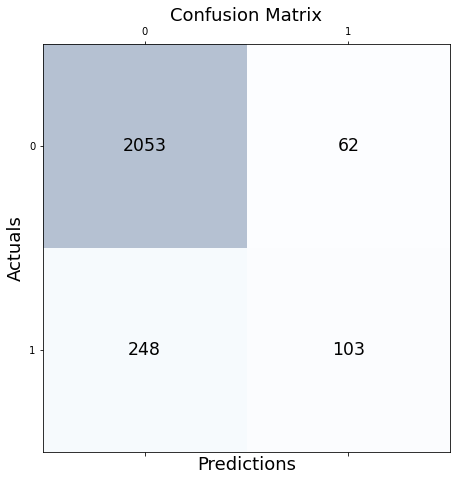

In [46]:
# print out stats and visualization of confusion matrix
print(classification_report(y_test, y_pred))

cm4 = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm4, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm4.shape[0]):
    for j in range(cm4.shape[1]):
        ax.text(x=j, y=i,s=cm4[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.7985344136644373


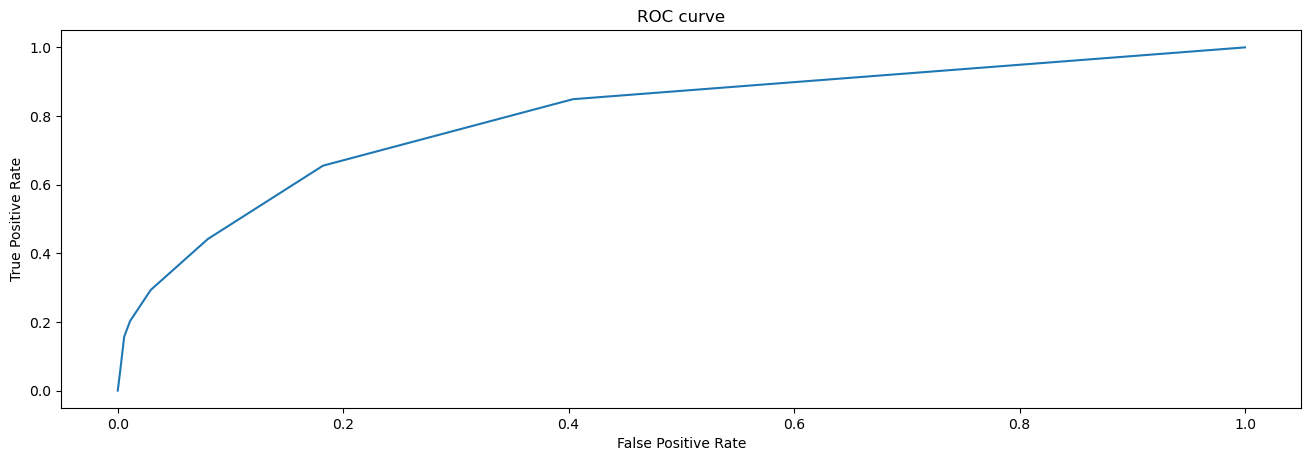

In [47]:
fpr = roc_curve(y_test, knn.predict_proba(X_test)[:,1])[0] # false positiv 
tpr = roc_curve(y_test, knn.predict_proba(X_test)[:,1])[1] # true positive 
roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])

# plotting the ROC curve
plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', roc_auc)

In [48]:
# finding the Permutation importance

perm = PermutationImportance(knn).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0651 ± 0.0045,PageValues
0.0073 ± 0.0046,ProductRelated_Duration
0.0040 ± 0.0076,Administrative_Duration
0.0018 ± 0.0042,ProductRelated
0.0003 ± 0.0037,Informational_Duration
0.0002 ± 0.0004,Administrative
0 ± 0.0000,Month_Jul
0 ± 0.0000,Month_June
0 ± 0.0000,Month_Mar
0 ± 0.0000,BounceRates


From this application of 'Permutation Importance' to our KNN model, 'PageValues' and 'Product Related Duration' appear to us as the main feature of importance when defining who will or will not make the purchase. This indicated that the more and the longer the product page has been viewed, the larger chance the customer will purchase. 

However, we could have a better model when selecting better hyperparameters. So we will do a grid search on different hyperparameter. Then we will select the best model from the grid, train on entire training set and evaluate best model on the test set.

In [49]:
# create a pipeline 
pipe = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', KNeighborsClassifier())
])

pipe.fit(X_train, y_train)
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.9073398215733982
Test set score: 0.8896999188969992


In [50]:
# setting up parameters - number of neighbors
parameters = {
 'classifier__n_neighbors': [1, 3, 5, 7, 10]
}
# create grid search
grid = GridSearchCV(pipe, parameters,scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'],
                    cv=5, n_jobs = -1, refit=False,verbose=0).fit(X_train, y_train)

In [51]:
# fit grid search
best_model = grid.fit(X_train, y_train)

Take a look at our grid search result

In [52]:
best_model.cv_results_

{'mean_fit_time': array([0.07479305, 0.06789064, 0.0694169 , 0.07223959, 0.06771693]),
 'std_fit_time': array([0.00614116, 0.00316065, 0.0044747 , 0.0065796 , 0.00418125]),
 'mean_score_time': array([0.99627099, 1.18802872, 1.33055763, 1.4577014 , 1.40610828]),
 'std_score_time': array([0.02603629, 0.02281447, 0.03071443, 0.030865  , 0.26218933]),
 'param_classifier__n_neighbors': masked_array(data=[1, 3, 5, 7, 10],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'classifier__n_neighbors': 1},
  {'classifier__n_neighbors': 3},
  {'classifier__n_neighbors': 5},
  {'classifier__n_neighbors': 7},
  {'classifier__n_neighbors': 10}],
 'split0_test_accuracy': array([0.84946782, 0.87176888, 0.87582362, 0.8768373 , 0.87633046]),
 'split1_test_accuracy': array([0.85352255, 0.86416624, 0.86568677, 0.86771414, 0.87328941]),
 'split2_test_accuracy': array([0.85605677, 0.86872783, 0.8803852 , 0.88139888, 0.88089204]),
 'split3

In [53]:
# get the model with highest accuracy from grid search
p_accu = best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_accuracy']) ]
p_accu

{'classifier__n_neighbors': 10}

In [54]:
# set the selected parameter to the pipeline
pipe.set_params(**p_accu)

Pipeline(steps=[('scaler', StandardScaler()), ('selector', VarianceThreshold()),
                ('classifier', KNeighborsClassifier(n_neighbors=10))])

In [55]:
# train on the entire training set with the model with highest accuracy from grid search
clf = pipe.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score2 = clf.score(X_test, y_test)
print("The accuracy score for the optimized model is", score2)

The accuracy score for the optimized model is 0.8896999188969992


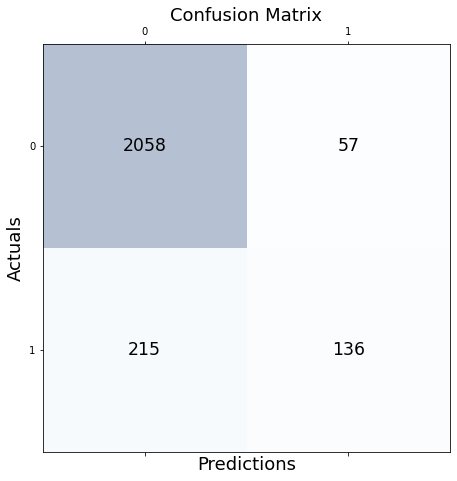

In [56]:
# print out stats and visualization of confusion matrix after optimization
cm5 = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm5, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm5.shape[0]):
    for j in range(cm5.shape[1]):
        ax.text(x=j, y=i,s=cm5[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.865143157341739


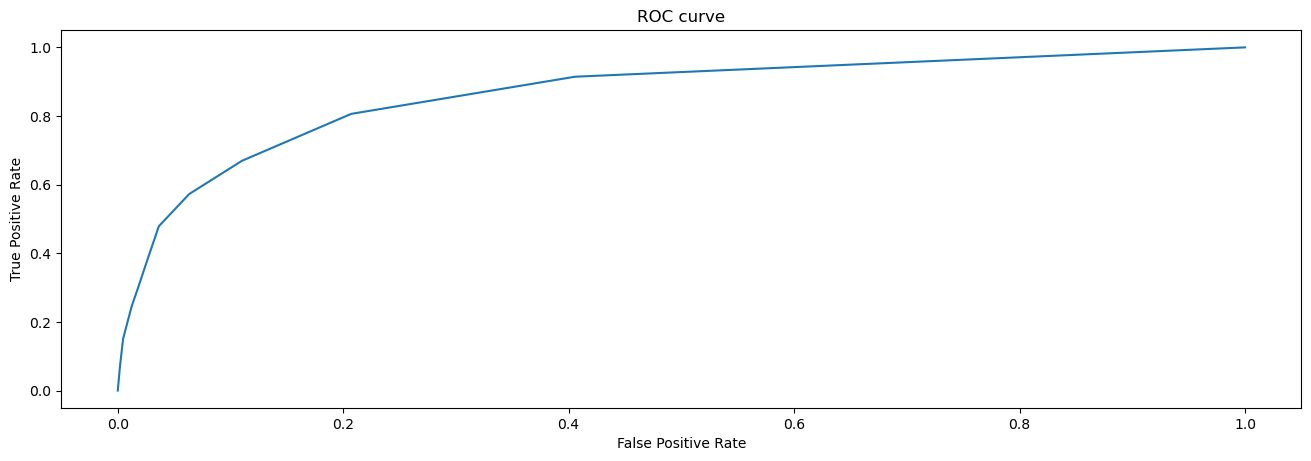

In [57]:
fpr = roc_curve(y_test, clf.predict_proba(X_test)[:,1])[0] # false positiv 
tpr = roc_curve(y_test, clf.predict_proba(X_test)[:,1])[1] # true positive 
roc_auc2 = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
# plotting the ROC curve after optimization
plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', roc_auc2)

## Support Vector Machine(SVM)

In [58]:
# use a linear kernel and C = 1 our SVM model and set random_state to 0
from sklearn import metrics
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C = 1, random_state = 0, probability = True)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [59]:
accuracy = metrics.accuracy_score(y_pred,y_test)

print("The accuracy score for this model is:", accuracy)

The accuracy score for this model is: 0.8925385239253852


              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2115
           1       0.74      0.38      0.50       351

    accuracy                           0.89      2466
   macro avg       0.82      0.68      0.72      2466
weighted avg       0.88      0.89      0.88      2466



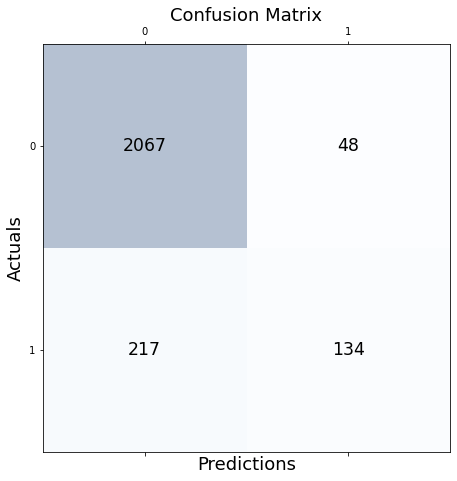

In [60]:
# print out stats and visualization of confusion matrix
print(classification_report(y_test, y_pred))

cm6 = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm6, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm6.shape[0]):
    for j in range(cm6.shape[1]):
        ax.text(x=j, y=i,s=cm6[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.675860257420541


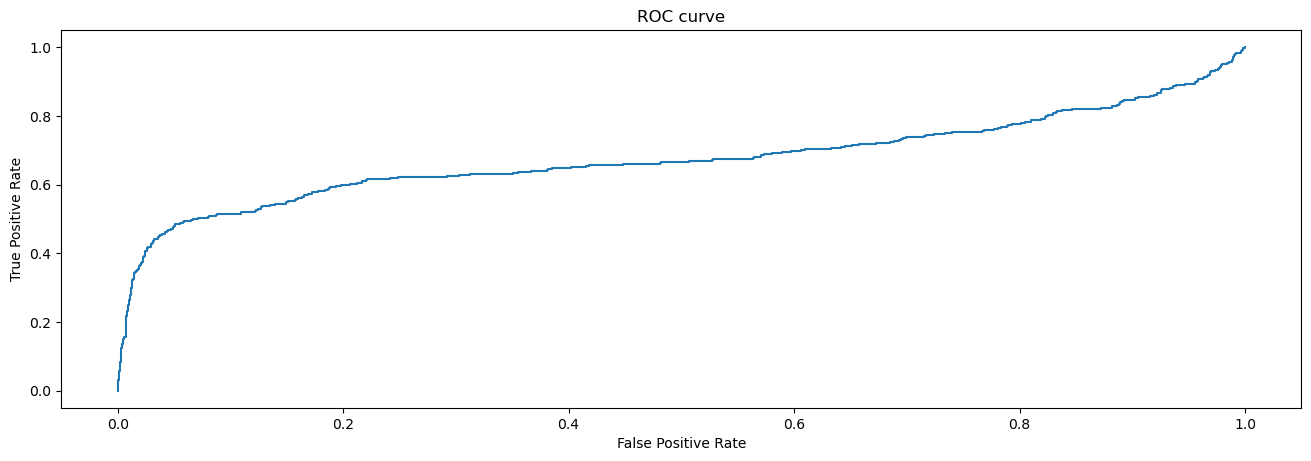

In [61]:
fpr = roc_curve(y_test, svm.predict_proba(X_test)[:,1])[0] # false positive
tpr = roc_curve(y_test, svm.predict_proba(X_test)[:,1])[1] # true positive 
roc_auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:,1])

# plotting the ROC curve
plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', roc_auc)

In [62]:
# finding the Permutation importance

perm = PermutationImportance(svm).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1005 ± 0.0082,PageValues
0.0019 ± 0.0084,ProductRelated_Duration
0.0015 ± 0.0016,Month_Nov
0.0003 ± 0.0008,ProductRelated
0.0002 ± 0.0004,ExitRates
0.0002 ± 0.0004,BounceRates
0.0001 ± 0.0003,Month_Aug
0.0001 ± 0.0012,Month_May
0 ± 0.0000,Administrative_Duration
0 ± 0.0000,VisitorType_Other


From this application of 'Permutation Importance' to our SVM model, 'PageValues' and 'Product Related Duration' appear to us as the main feature of importance when defining who will or will not make the purchase. This indicated that the more and the longer the product page has been viewed, the larger chance the customer will purchase. 

However, we could have a better model when selecting better hyperparameters. So we will do a grid search on different hyperparameter. Then we will select the best model from the grid, train on entire training set and evaluate best model on the test set.

In [63]:
# create a pipeline 
# scaler to run in parallel
pipe = Pipeline([('scaler', StandardScaler()),("classifier", SVC())])

# FIT THE MODEL
pipe.fit(X_train, y_train)
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.9011557177615572
Test set score: 0.8994322789943228


In [64]:
parameters = {
 'classifier__C': [0.001, 0.01,0.1, 1, 3,5],
 'classifier__kernel':['linear', 'rbf'],
 'classifier__probability': [True],
}
# create grid search
grid = GridSearchCV(pipe, parameters,scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'],
                    cv=5, n_jobs = -1, refit=False,verbose=0).fit(X_train, y_train)

In [65]:
best_model = grid.fit(X_train, y_train)

In [66]:
best_model.cv_results_

{'mean_fit_time': array([ 8.83730559, 10.71986699,  7.94916902, 11.71108265,  9.90437055,
        10.5455781 , 26.57819452,  9.34472299, 56.89408188,  9.67510219,
        81.97286243,  8.83459206]),
 'std_fit_time': array([ 0.12247692,  0.09365903,  0.2559104 ,  0.41042347,  0.50441932,
         0.33550414,  2.96277921,  0.49890039,  5.62349283,  0.65296627,
        11.45592228,  0.93956423]),
 'mean_score_time': array([0.25707002, 0.49590178, 0.26461873, 0.53437381, 0.23703604,
        0.46670737, 0.22173724, 0.43391843, 0.27389264, 0.40725298,
        0.19027405, 0.37588048]),
 'std_score_time': array([0.01880509, 0.02473279, 0.02787563, 0.01641703, 0.02177347,
        0.01198304, 0.00966425, 0.02484511, 0.09350725, 0.01028193,
        0.03154679, 0.06207264]),
 'param_classifier__C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 3, 3, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
   

In [67]:
# get the model with highest accuracy from grid search
p_accu = best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_accuracy']) ]
p_accu

{'classifier__C': 5,
 'classifier__kernel': 'rbf',
 'classifier__probability': True}

In [68]:
# set the selected parameter to the pipeline
pipe.set_params(**p_accu)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(C=5, probability=True))])

In [69]:
# train on the entire training set with the model with highest accuracy from grid search
clf = pipe.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score3 = clf.score(X_test, y_test)
print("The accuracy score for the optimized model is", score3)

The accuracy score for the optimized model is 0.9038929440389294


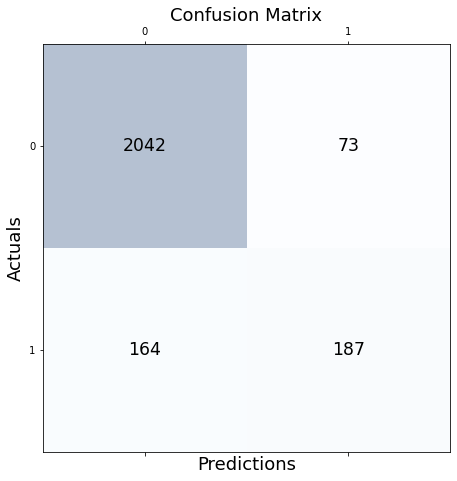

In [70]:
# print out stats and visualization of confusion matrix after optimization
cm7 = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm7, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm7.shape[0]):
    for j in range(cm7.shape[1]):
        ax.text(x=j, y=i,s=cm7[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.8649464885871506


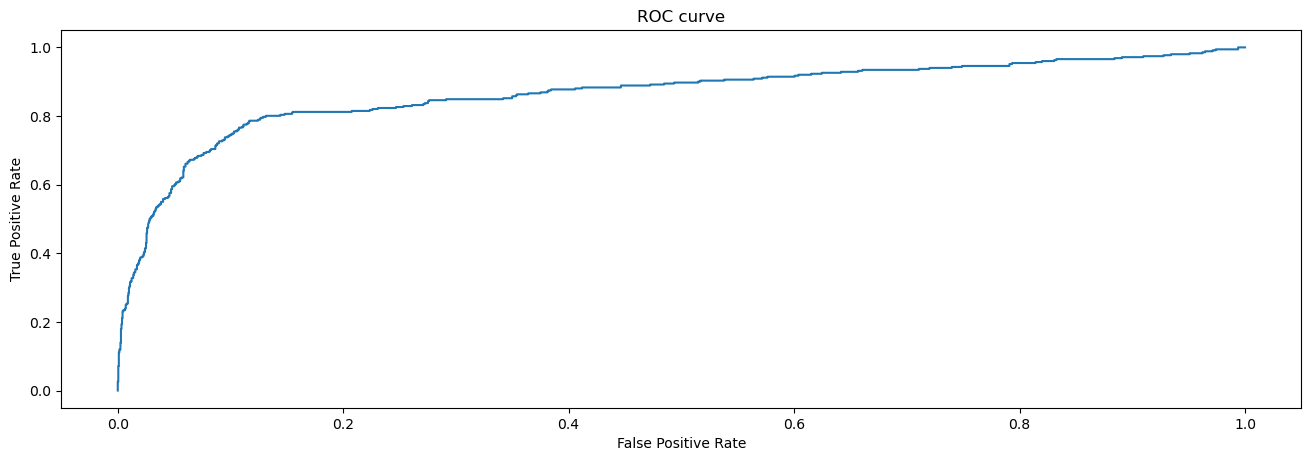

In [71]:
fpr = roc_curve(y_test, clf.predict_proba(X_test)[:,1])[0] # false positive 
tpr = roc_curve(y_test, clf.predict_proba(X_test)[:,1])[1] # true positive 
roc_auc3 = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
# plotting the ROC curve after optimization
plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', roc_auc3)

## Random Forest

We train a random forest model on our dataset in order to compute the similarity between the point we want to predict and every data points in our dataset. We then print out its Accuracy, Confusion Matrix, and ROC curve to evaluate its performance.

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
# setup model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [105]:
# evaluating the model
accuracy = metrics.accuracy_score(y_pred,y_test)
print("The accuracy score for this model is:", accuracy)

The accuracy score for this model is: 0.9087591240875912


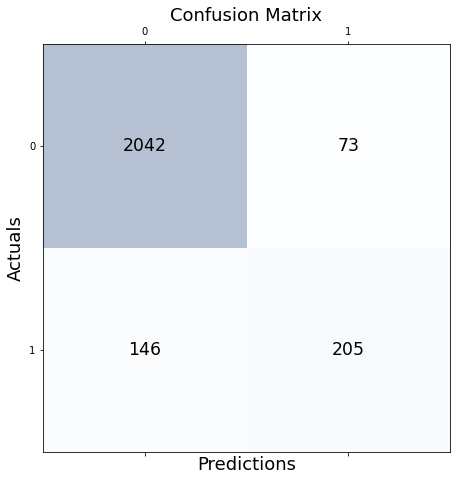

In [75]:
# confusion matrix
cm8 = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm8, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm8.shape[0]):
    for j in range(cm8.shape[1]):
        ax.text(x=j, y=i,s=cm8[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [76]:
# classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2115
           1       0.74      0.58      0.65       351

    accuracy                           0.91      2466
   macro avg       0.84      0.77      0.80      2466
weighted avg       0.91      0.91      0.91      2466



Area under the Receiver Operating Characteristic curve: 0.9300297023701278


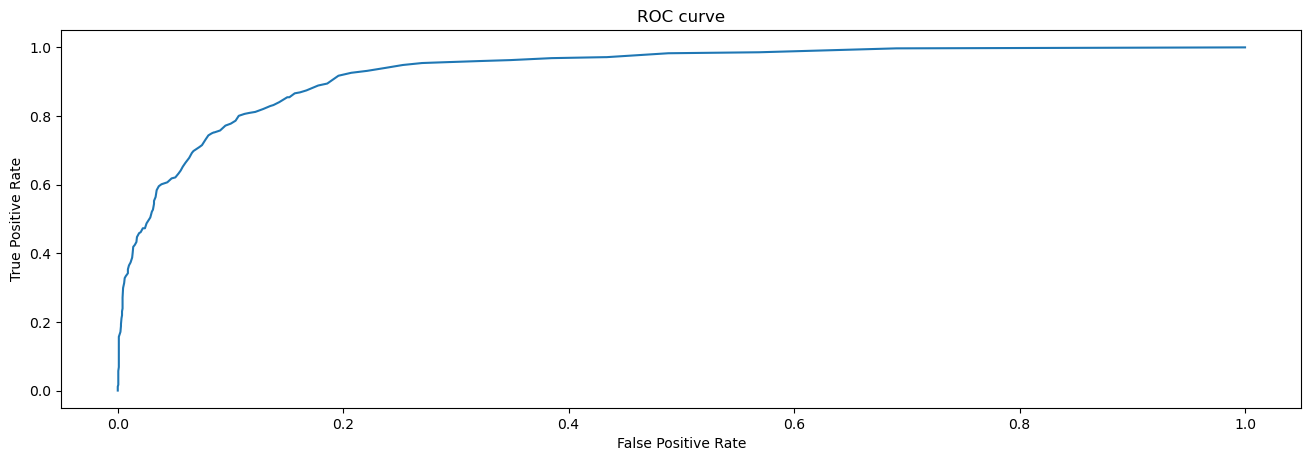

In [77]:
fpr = roc_curve(y_test, rf.predict_proba(X_test)[:,1])[0] # false positive
tpr = roc_curve(y_test, rf.predict_proba(X_test)[:,1])[1] # true positive 
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

# plotting the ROC curve
plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', roc_auc)

In [78]:
# finding the Permutation importance

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1241 ± 0.0060,PageValues
0.0102 ± 0.0070,ExitRates
0.0101 ± 0.0041,ProductRelated
0.0077 ± 0.0034,Month_Nov
0.0076 ± 0.0059,BounceRates
0.0061 ± 0.0057,ProductRelated_Duration
0.0060 ± 0.0033,Administrative
0.0024 ± 0.0006,Informational_Duration
0.0022 ± 0.0030,Administrative_Duration
0.0018 ± 0.0014,Month_Mar


From this application of 'PermutationImportance' to our random forest model, 'PageValues' appears to us as the main feature of importance when defining who will or will not make the purchase. The more the product page has been viewed, the larger chance the customer will make the purchase.

However, we could have a better model when selecting better hyperparameters. So we will do a grid search on different hyperparameter. Then we will select the best model from the grid, train on entire training set and evaluate best model on the test set.

In [79]:
# create a pipeline 
# scaler to run in parallel
pipe = Pipeline([('scaler', StandardScaler()),("classifier", RandomForestClassifier())])

# FIT THE MODEL
pipe.fit(X_train, y_train)
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.9997972424979724
Test set score: 0.9120032441200324


In [96]:
param_grid = { 
    'classifier__n_estimators': [200, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [10, 1000, 10000, 100000],
    'classifier__criterion' :['gini', 'entropy']
}

# create grid search
grid = GridSearchCV(pipe, param_grid, scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'],
                    cv=5, refit=False, verbose=0).fit(X_train, y_train)

In [97]:
best_model = grid.fit(X_train, y_train)

In [98]:
# get the model with highest accuracy from grid search
p_accu = best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_accuracy']) ]
p_accu

{'classifier__criterion': 'gini',
 'classifier__max_depth': 10,
 'classifier__max_features': 'sqrt',
 'classifier__n_estimators': 200}

In [99]:
# set the selected parameter to the pipeline
pipe.set_params(**p_accu)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, max_features='sqrt',
                                        n_estimators=200))])

In [100]:
# train on the entire training set with the model with highest accuracy from grid search
clf = pipe.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score4 = clf.score(X_test, y_test)
print("The accuracy score for the optimized model is", score4)

The accuracy score for the optimized model is 0.9103811841038119


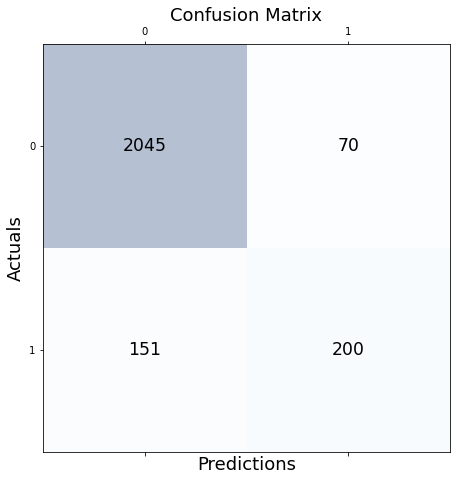

In [101]:
# print out stats and visualization of confusion matrix after optimization
cm9 = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm9, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm9.shape[0]):
    for j in range(cm9.shape[1]):
        ax.text(x=j, y=i,s=cm9[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.9372276440834361


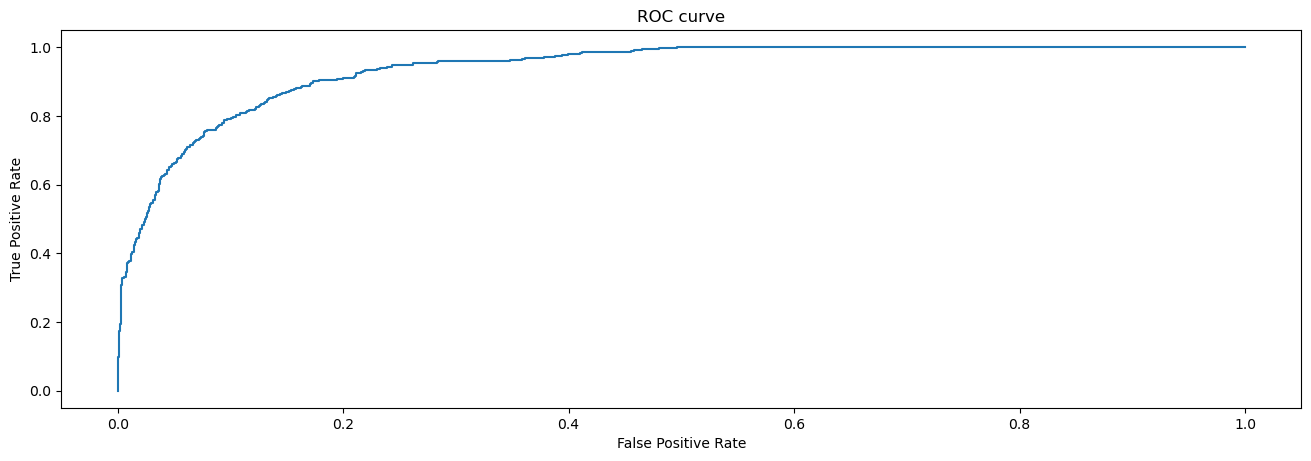

In [102]:
fpr = roc_curve(y_test, clf.predict_proba(X_test)[:,1])[0] # false positive 
tpr = roc_curve(y_test, clf.predict_proba(X_test)[:,1])[1] # true positive 
roc_auc4 = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
# plotting the ROC curve after optimization
plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', roc_auc4)

# Results

### Dataset and Algorithms Analysis
Our dataset includes various features of consumer shopping behaviors including time-spent on page, number of pages browsed, special days influence, etc, and a result of purchasing decision in binary form. Since we would like to predict a future customer’s purchasing decision (purchase or not) according to their shopping behavior, we would like to employ some classification machine learning models to solve this problem. 
	Since the problem we are trying to solve is a classification problem, the regression models, such as linear regression, polynomial regressions, might not be appropriate for solving our problem. Some appropriate models we are implementing are: logistic regression, KNN, SVM, random forest. 

### Feature Selection

After carefully examining all the columns in our dataset and our exploratory data analysis, we found out that columns like `OperatingSystems`, `Browser`, `Region`, and `TrafficType` do not demonstrate the meaning of their value, so we decide drop these columns in our prediction models in our feature selection process. 
Before fitting our dataset into the model, we did some transformation among different type of columns to get a better result. For the categorical columns: `VisitorType` and `Month`, we transformed them with one-hot-encoding technique. Although month seems like a numeric variable, after thinking about the role of month in our dataset we decide treat it as a ordinal categorical data. For the numeric columns, we transformed them with standard scaler to reduce the bias. 


### Hyper-Parameters Selection

For each model, we implement Pipline and GridSearch to search for the most appropriate hyperparameters that could generate the best performance of the model over our dataset. We are exploring those hyperparameters among different solvers, different penalties and different C values. 
The metric we are using in our hyper-parameters selection process is the accuracy. In order to make the best use of our dataset and get a unbiased accuracy while comparing different hyper parameters, we are comparing them with the average validation set accuracy from k-fold cross validation.

### Model Selection:

#### Logistic Regression:
Logistic Regression should be suitable classification for our large dataset with its advantage in speed and it fulfills our requirement of predicting binary purchase decision with multiple features. Before selecting the best hyperparameters, we obtained an accuracy of 88.93%, and an ROC of 0.908. By selecting the hyperparameter with the best performance, we obtained an accuracy of 89.09% and an ROC of 0.9099 respectively.
#### K-Nearest Neighbor:
KNN can be employed to predict value of new data by considering k nearest neighbours with multiple features thus feasible for our dataset. Though it may have limitation in high-dimensional problem for the difficulty of calculating the distance in each dimension, we implement it for its saving of training time. Without adjusting our model, we obtained an accuracy of 87.43%, and an ROC of 0.7985. By selecting the hyperparameter with the best performance, we obtained an accuracy of 88.97% and an ROC of 0.8651.
#### Support Vector Machine:
SVM draws a decision boundary in a form of margin between the two classes in our dataset: Purchase (True or False). It would be appropriate for our dataset with its accommdality over high-dimensional and large dataset as well as its advantages in accuracy. Thus, SVM should be suitable for our dataset. Before adjusting our model, we obtained an accuracy of 89.25%, and an ROC of 0.6758. By selecting the model with highest accuracy, we obtained an accuracy of 90.39% and an ROC of 0.8649.
#### Random Forest:
The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree. It would be appropriate for our dataset with its accommdality over high-dimensional and large dataset as well as its advantages in accuracy. Before adjusting our model, we obtained an accuracy of 90.88%, and an ROC of 0.93. By selecting the model with highest accuracy, we obtained an accuracy of 91.04% and an ROC of 0.9372.

In [103]:
table = pd.DataFrame({'Algorithm': ['Logistic Regression', 'KNN','SVM',
                                    'Random Forest'], 
                      'Accurracy': [score1, score2, score3, score4], 
                      'ROC Score': [roc_auc1, roc_auc2, roc_auc3, roc_auc4]})

print('============ Model Summary ===========')
table

============ Model Summary ===========


,Algorithm,Accurracy,ROC Score
0,Logistic Regression,0.890916,0.909852
1,KNN,0.889700,0.865143
2,SVM,0.903893,0.864946
3,Random Forest,0.910381,0.937228


By looking at the testing set accuracy of four different models with the most appropriate hyper-parameters for our dataset, we can see that the random forest has the highest accuracy among all models. K-NN has the least desirable performance among four different models which could be due to the high dimensionility of our our dataset and the poor performance of K-NN model with high dimensionality data. Logistic regression and SVM are also appropriate classifier for our dataset since they also has a nearly 90% accuracy in testing dataset.

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy
This dataset is a public dataset obtained from the UCI Machine Learning Repository. The personal  identification information has been erased from the dataset before we obtained the data to ensure anonymity, so there should be no privacy issues for our project. 

However, there is no information about when those data were collected, and whether they are representative of a typical online shopping customer. Therefore, there might be some biases in our dataset which will result in some undesirable variation in our model.

Another ethical concern would be that scammers could utilize this model to take unfair advantage on targeting their potential victims more precisely by selecting those who are more prone to make a purchase according to the algorithm we designed. Thus,  we should declare this project for educational purposes only and place justifiable concerns if we decide to make our model public on github.

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="rananote"></a>1.[^](#rana): R. A. E. -D. Ahmeda, M. E. Shehaba, S. Morsya and N. Mekawiea, "Performance Study of Classification Algorithms for Consumer Online Shopping Attitudes and Behavior Using Data Mining," 2015 Fifth International Conference on Communication Systems and Network Technologies, 2015, pp. 1344-1349, doi: 10.1109/CSNT.2015.50.. https://ieeexplore.ieee.org/abstract/document/7280138?casa_token=XkLf7qMj_xgAAAAA:nXykZzXHLKrjWwqPlZ8rUtD--pGMmEtgtAcTVaeUcePQ0HST6ZgwEtDnoX4YKhbpolt569EhHx0K<br> 

<a name="sakarnote"></a>2.[^](#sakar): Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks. Neural Comput & Applic 31, 6893–6908 (2019). https://doi.org/10.1007/s00521-018-3523-0<br>


<a name="carmonanote"></a>3.[^](#carmona): C.J. Carmona, S. Ramírez-Gallego, F. Torres, E. Bernal, M.J. del Jesus, S. García,
Web usage mining to improve the design of an e-commerce website: OrOliveSur.com,Expert Systems with Applications,Volume 39, Issue 12,2012,Pages 11243-11249,ISSN 0957-4174,https://doi.org/10.1016/j.eswa.2012.03.046(https://www.sciencedirect.com/science/article/pii/S0957417412005696)<br>
